<a href="https://colab.research.google.com/github/S-Soluel/CS_167_Colab_Files/blob/main/Project1_SS_Workspace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Project 1: Work Space*
**Name: Sam Solheim**

---
---
## Learning Objectives:

For this project, you will use the scikit-learn library to conduct a machine learning experiment, and your write-up will ask you to explain what you did and interpret the results. 

This directly addresses two of the course learning objectives stated in the syllabus:
- Students will be able to create software which utilizes machine learning programming libraries in order to conduct machine-learning-based data analysis.
- Students will be able to develop and conduct machine-learning-based data analysis experiments, and they will be able to interpret and explain the results.




# Project #1 Expectations: Written Portion
You will submit a link to your GitHub repository which includes your code and results to document your experiment.
And, most importantly, you will use markdown cells in the notebook to explain what you did, interpret the results, and draw conclusions.

1. __Name__: include your name at the top of the notebook
2. __Data Description__: Answer the following questions:
    - Explain what dataset you chose, and why you chose it. 
    - Specify which columns you are using as your __predictor variables__
    - What variable are you selecting as your __target variable__? 
    - In selecting this target variable, does this make your problem a __classification__ or a __regression__? 
3. __Research Question__: As clearly/specifcially as possible, state the question you are trying to solve in this project.
4. __Data Preparation__: Explain what pre-processing steps you chose to do to get your dataset in shape for your experiments. (e.g. creation of dummy variables, filling in missing values, normalization, etc.) 
5. __Metrics__: Identify which metrics you will be using to test your model and say why they are appropriate.
6. __Baseline Performance__: Identify a baseline for your metrics--what woudld you expect to happen with this particular data if you always guessed the average or if you guessed randomly? Use `sklearn.dummy` to establish this baseline.
7. __Model Planning and Execution__: Identify which learning algorithms you have tried and which important parameteres you've tuned for each one. 
8. __Results__: After you conduct your learning experiment, summarize the results you got. Include visualizations (i.e. graphs) where appropriate. How did you find the best k, n, m, or other variables that you needed to tune?
9. __Bumps in the road__: What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not?
10. __Conclusions__: What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which modles didn't work as well? Why do you think this is ? In general, I want a discussion of your experiment, the results, and what they mean.

# Info to Format Later
---
- **The overall goal of this analysis:** seeing whether certain variables are better / worse at predicting whether a hotel reservation will be cancelled, or not.
- Dataset is from Kaggle-user Ahsan Raza. "Hotel Reservations Dataset"


Bumps in the road:
- When I started to write an entire program from scratch to get dummy variables for categorical variables in my model... definitely went down a bit of a rabbit hole
- Additionally kept getting an error that I was using a column-vector y when it needed to be a 1 dimensional array. Had to work through this

In [166]:
# load in the data and necessary libraries
import sklearn # Import sklearn and necessary sublibraries
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler # Import StandardScaler for normalization

# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
import pandas as pd
hotel_res = pd.read_csv('/content/drive/MyDrive/JTerm2023/datasets/Hotel_Reservations.csv')
hotel_res.head()

hotel_res.isna().any()
# Looks like there are no missing values in our data, that's a good thing, and should hopefully speed up the data cleaning process
hotel_res.shape # 36,275 observations with 19 variables

# The overall goal of this analysis: seeing whether certain variables are better / worse at 
# predicting whether a hotel reservation will be cancelled, or not.

(36275, 19)

Further context on variables:
---
---
- no_of_adults: self explanatory
- no_of_children: also self explanatory
- type_of_meal_plan: encoded by INN Hotels
- room_type_reserved: also encoded by INN Hotels
- lead_time: # of days between booking hotel, and arrival date
- no_of_weekend_nights
- no_of_week_nights
- arrival_month
- Etc.
  - market_segment_type: did the person book online / offline, etc.
  - repeated_guest: 0 = No, 1 = Yes
  - avg_price_per_room: in euros
  - no_of_special_requests
  - required_car_parking_space: 0 = No, 1 = Yes
  - booking_status: **this is the variable we want to predict**

### Data Preparation

In [205]:
hotel_res.columns
# Going to use booking_status as our response variable, will be dropping unnecessary variables that aren't going to be used in this analysis. 

not_used = ["Booking_ID", "arrival_year", "arrival_date", "no_of_previous_bookings_not_canceled", "no_of_previous_cancellations"]
# Getting names of only the variables that will be used later in the models
base_columns = hotel_res.columns.drop(not_used)
# Then, drop the response variable
target = 'booking_status'

print(base_columns)

# Implementing for loop to go through the variables that will be used. 
# This'll allow me to see which need to be changed from categorical variables to the numeric equivalent. 
for k in base_columns:
  print(k, "has the following unique levels:")
  print(hotel_res[k].unique())
  print()

needs_cleaning = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

# Variables to change from categorical to numeric:
# type_of_meal_plan, room_type_reserved, and market_segment_type
for k in needs_cleaning:
  print(k, "has the following unique levels:")
  print(hotel_res[k].unique())
  print()


Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_month',
       'market_segment_type', 'repeated_guest', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')
no_of_adults has the following unique levels:
[2 1 3 0 4]

no_of_children has the following unique levels:
[ 0  2  1  3 10  9]

no_of_weekend_nights has the following unique levels:
[1 2 0 4 3 6 5 7]

no_of_week_nights has the following unique levels:
[ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]

type_of_meal_plan has the following unique levels:
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']

required_car_parking_space has the following unique levels:
[0 1]

room_type_reserved has the following unique levels:
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

lead_time ha

In [207]:
# Cleaning vars - type_of_meal_plan, room_type_reserved, and market_segment_type
# need to get dummy variables for these three categorical variables
  # Hold up Sam... we can just use pd.get_dummies() to get dummy variables...
  # Please don't try writing something from scratch

hotel_res_w_dummies = pd.get_dummies(hotel_res, columns = needs_cleaning)
hotel_res_w_dummies.head()
hotel_res_w_dummies.columns
# yeah that was a lot easier... oops?

hotel_res_w_dummies = pd.get_dummies(hotel_res_w_dummies, columns = [target])
print(hotel_res_w_dummies.columns)


# Troubleshooting: attempting to get the correct outputs when splitting my training and testing data
predictors_with_dummies = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'required_car_parking_space',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'lead_time', 'arrival_month', 
       'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'repeated_guest', 'avg_price_per_room',
       'no_of_special_requests']

print(len(predictors_with_dummies))

target_with_dummies = 'booking_status_Canceled'


Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'booking_status_Canceled', 'booking_status_No

### Sam Getting Sidetracked (code below):

In [ ]:
# Wow this'll be fun

#for k in needs_cleaning:
 #   for i in hotel_res_clean[k]:
 #     # Need to implement three big else/if sections. 1 for each variable needing to be converted
 #     if k == 'room_type_reserved':
 #   
 #     if hotel_res_clean[k][i] == 'Room_Type 1':
 #       hotel_res_clean[k][i] = 1
#      else
      #'Room_Type 4'
      #'Room_Type 2'
      #'Room_Type 6'
      #'Room_Type 5'
      #'Room_Type 7'
      #'Room_Type 3'

# Ignore me going down a bit of a rabbit hole and realizing I didn't need to partway through


In [264]:


# 1. Split the data into training and testing sets


train_data, test_data, train_sln, test_sln = train_test_split(hotel_res_w_dummies[predictors_with_dummies], 
                                                              hotel_res_w_dummies[target_with_dummies], 
                                                              test_size = 0.2, random_state = 13)

# Found the issue that was making it have the column name when we didn't want it to keep that
# used target = ['booking_status'] when it needed to be target = 'booking_status' instead
print(train_data.shape)
print(train_sln.shape)
print(test_data.shape)
print(test_sln.shape)

train_data.head()


# Looks good, finally can start making models

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,required_car_parking_space,room_type_reserved_Room_Type 1,...,lead_time,arrival_month,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest,avg_price_per_room,no_of_special_requests
14887,2,1,0,2,1,0,0,0,0,1,...,44,10,0,0,0,1,0,0,100.00,0
14659,2,0,0,2,1,0,0,0,1,1,...,159,7,0,0,0,0,1,0,105.30,0
28466,2,0,2,3,1,0,0,0,0,1,...,63,4,0,0,0,0,1,0,99.79,1
29204,2,1,0,2,1,0,0,0,0,0,...,5,12,0,0,0,0,1,0,181.00,0
21606,1,0,1,2,1,0,0,0,0,1,...,26,10,0,0,0,1,0,0,77.00,0


###1. Models on Non-Normalized Data
---

In [265]:
# Making models with both a kNN classifier and weighted kNN classifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Import matplot for graphs
%matplotlib inline

hotel_res_labels = ["Not_Canceled", "Canceled"]

kNN_mod = KNeighborsClassifier(n_neighbors = 3, weights = "uniform") 
# n_neighbors supplies the value for 'k'
kNN_mod.fit(train_data, train_sln)

kNN_mod_preds = kNN_mod.predict(test_data)

kNN_mod_acc = sklearn.metrics.accuracy_score(test_sln, kNN_mod_preds)

print("The accuracy score for a kNN algorithm at k = 3 is:", kNN_mod_acc)


The accuracy score for a kNN algorithm at k = 3 is: 0.8257753273604411


              Not_Canceled  Canceled
Not_Canceled          4322       562
Canceled               702      1669


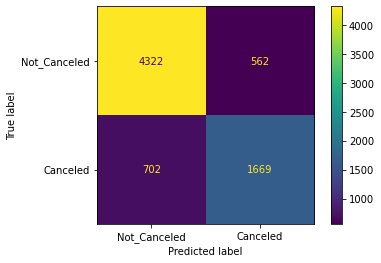

In [266]:
conf_mat = metrics.confusion_matrix(test_sln, kNN_mod_preds, labels = [0,1])

print(pandas.DataFrame(conf_mat,index = hotel_res_labels, columns = hotel_res_labels))

displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=hotel_res_labels)
displ.plot()
plt.show()


In [267]:
# Weighted kNN Classifier

w_kNN_mod = KNeighborsClassifier(n_neighbors = 3, weights = "distance") 
# n_neighbors supplies the value for 'k'
w_kNN_mod.fit(train_data, train_sln)

w_kNN_mod_preds = kNN_mod.predict(test_data)

w_kNN_mod_acc = sklearn.metrics.accuracy_score(test_sln, w_kNN_mod_preds)

print("The accuracy score for a weighted kNN algorithm at k = 3 is:", w_kNN_mod_acc)

# Interestingly enough, I tried several values for k and found that the lower values tended to give us a higher accuracy for the model
# This might be a hint for us that many of the variables have similar weights / importances to whether someone cancels their reservation or not


The accuracy score for a weighted kNN algorithm at k = 3 is: 0.8257753273604411


              Not_Canceled  Canceled
Not_Canceled          4322       562
Canceled               702      1669


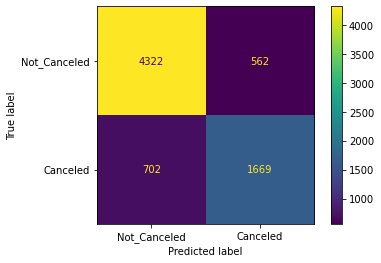

In [220]:
# Confusion Matrix for weighted kNN model
conf_mat_w_kNN = metrics.confusion_matrix(test_sln, w_kNN_mod_preds, labels = [0,1])

print(pandas.DataFrame(conf_mat_w_kNN,index = hotel_res_labels, columns = hotel_res_labels))

displ = ConfusionMatrixDisplay(confusion_matrix = conf_mat_w_kNN, display_labels = hotel_res_labels)
displ.plot()
plt.show()

This non-default decision tree has an accuracy of: 0.8118538938662991


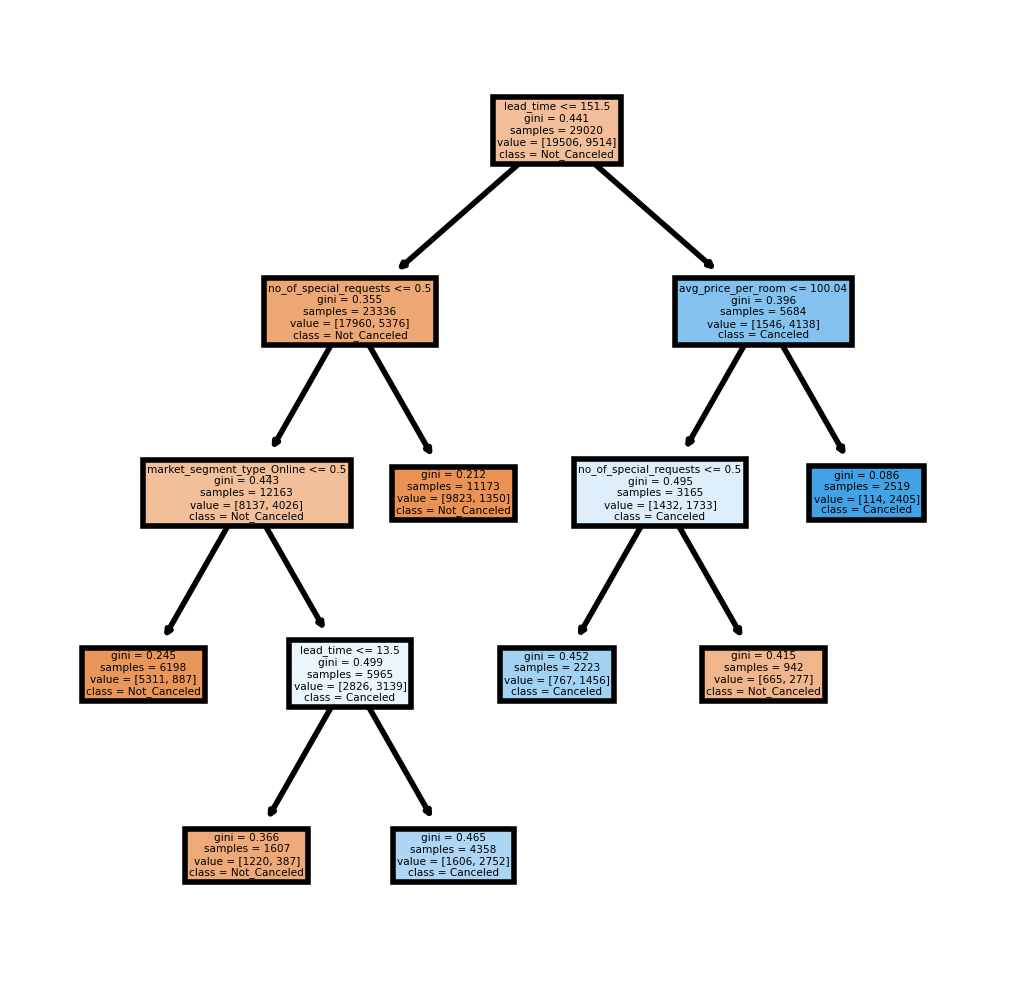

In [268]:
# Decision Tree based on non-normalized data


dt_non_norm = tree.DecisionTreeClassifier(splitter = "best", max_leaf_nodes = 7, 
                                          random_state = 54)
dt_non_norm.fit(train_data, train_sln)

dt_non_norm_preds = dt_non_norm.predict(test_data)
dt_non_norm_acc = sklearn.metrics.accuracy_score(test_sln, dt_non_norm_preds)

print("This non-default decision tree has an accuracy of:", dt_non_norm_acc)

# visualizing decision tree
import matplotlib.pyplot as plt

fn = predictors_with_dummies
cn = hotel_res_labels

fig, axes = plt.subplots(figsize = (3,3), dpi=400)
tree.plot_tree(dt_non_norm,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [269]:
# Random Forest on Non-Normalized Data

forest_non_norm = RandomForestClassifier(n_estimators = 600, random_state = 13, max_features = "sqrt")
forest_non_norm.fit(train_data, train_sln)

fnn_predictions = forest_non_norm.predict(test_data)
fnn_acc = sklearn.metrics.accuracy_score(test_sln, fnn_predictions)
print("The Random Forest with 600 trees has an accuracy of:", fnn_acc)


The Random Forest with 600 trees has an accuracy of: 0.8996554100620262


              Not_Canceled  Canceled
Not_Canceled          4606       278
Canceled               450      1921


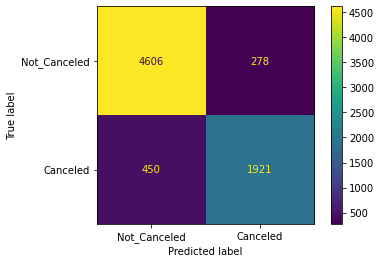

In [270]:
# Confusion Matrix for Random Forest
conf_mat_fnn = metrics.confusion_matrix(test_sln, fnn_predictions, labels = [0,1])

print(pandas.DataFrame(conf_mat_fnn , index = hotel_res_labels, columns = hotel_res_labels))

displ = ConfusionMatrixDisplay(confusion_matrix = conf_mat_fnn, display_labels = hotel_res_labels)
displ.plot()
plt.show()

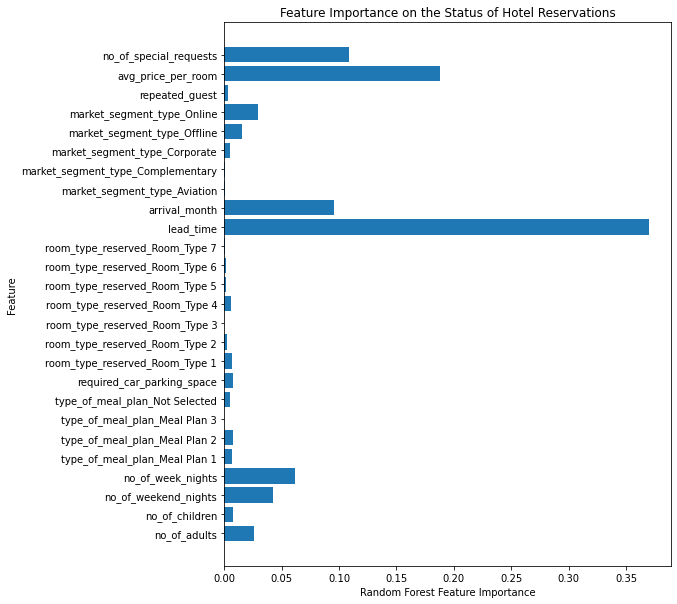

In [249]:
index = range(len(predictors_with_dummies)) #creates a list of numbers the right size to use as the index



plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
plt.barh(index ,forest_non_norm.feature_importances_, height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index, predictors_with_dummies) #put the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance on the Status of Hotel Reservations")
plt.show()

Looking at the feature importance chart, it's fairly obvious that lead_time is the most important variable, with other variables like arrival month also being somewhat important. 

###2. Models on Normalized Data
---

In [283]:
# First need to normalize the training / testing data
scaler = StandardScaler()
scaler.fit(train_data)

train_data_norm = scaler.transform(train_data)
test_data_norm = scaler.transform(test_data)

print(train_data_norm)

[[ 0.2931551   2.22794982 -0.93268624 ... -0.15995829 -0.10511932
  -0.78769911]
 [ 0.2931551  -0.26204108 -0.93268624 ... -0.15995829  0.04616051
  -0.78769911]
 [ 0.2931551  -0.26204108  1.36400911 ... -0.15995829 -0.11111342
   0.48069664]
 ...
 [ 0.2931551  -0.26204108  1.36400911 ... -0.15995829 -0.65457907
  -0.78769911]
 [ 2.22445157 -0.26204108  1.36400911 ... -0.15995829  0.98124111
   0.48069664]
 [ 0.2931551  -0.26204108  0.21566143 ... -0.15995829 -0.13937135
   1.7490924 ]]


In [284]:
# Same models as before, but this time modelled on normalized data. 

kNN_mod_norm = KNeighborsClassifier(n_neighbors = 3, weights = "uniform") 
# n_neighbors supplies the value for 'k'
kNN_mod_norm.fit(train_data_norm, train_sln)

kNN_mod_norm_preds = kNN_mod.predict(test_data_norm)

kNN_mod_norm_acc = sklearn.metrics.accuracy_score(test_sln, kNN_mod_preds)

print("The accuracy score for a kNN algorithm at k = 3 is:", kNN_mod_norm_acc)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


The accuracy score for a kNN algorithm at k = 3 is: 0.8257753273604411


In [286]:
# Weighted kNN Classifier with Normalized Data

w_kNN_mod_norm = KNeighborsClassifier(n_neighbors = 10, weights = "distance") 
# n_neighbors supplies the value for 'k'
w_kNN_mod_norm.fit(train_data_norm, train_sln)

w_kNN_mod_norm_preds = kNN_mod.predict(test_data_norm)

w_kNN_mod_norm_acc = sklearn.metrics.accuracy_score(test_sln, w_kNN_mod_norm_preds)

print("The accuracy score for a weighted kNN algorithm at k = 3 is:", w_kNN_mod_norm_acc)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


The accuracy score for a weighted kNN algorithm at k = 3 is: 0.6731909028256375


This non-default decision tree has an accuracy of: 0.8118538938662991


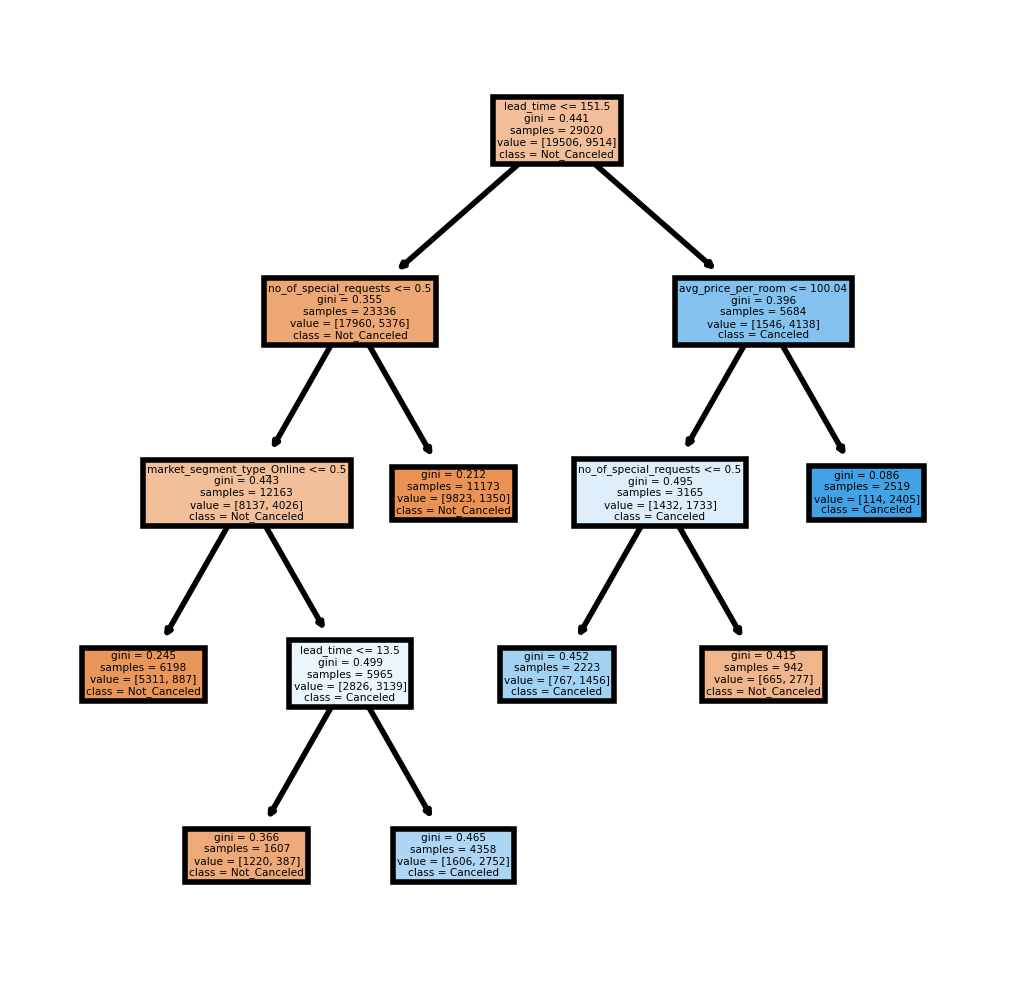

In [287]:
dt_norm = tree.DecisionTreeClassifier(splitter = "best", max_leaf_nodes = 7, 
                                          random_state = 54)
dt_norm.fit(train_data, train_sln)

dt_norm_preds = dt_norm.predict(test_data)
dt_norm_acc = sklearn.metrics.accuracy_score(test_sln, dt_norm_preds)

print("This non-default decision tree has an accuracy of:", dt_norm_acc)

# visualizing decision tree
import matplotlib.pyplot as plt

fn = predictors_with_dummies
cn = hotel_res_labels

fig, axes = plt.subplots(figsize = (3,3), dpi=400)
tree.plot_tree(dt_non_norm,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [288]:
# Random Forest on Normalized Data

forest_norm = RandomForestClassifier(n_estimators = 600, random_state = 13, max_features = "sqrt")
forest_norm.fit(train_data, train_sln)

fn_predictions = forest_norm.predict(test_data)
fn_acc = sklearn.metrics.accuracy_score(test_sln, fn_predictions)
print("The Random Forest with 600 trees has an accuracy of:", fnn_acc)

The Random Forest with 600 trees has an accuracy of: 0.8996554100620262
